In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/MulticlassClassificationDataset.csv')

In [3]:
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [5]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [6]:
#remove the non-significant variables
df.drop(columns=['studyName', 'Sample Number', 'Individual ID', 'Comments', 'Date Egg'], axis=1, inplace=True)

In [7]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [8]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [10]:
for i in df.columns:
    print("*****************",i,"*********************")
    print()
    print(set(df[i].to_list()))

***************** Species *********************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}
***************** Island *********************

{'Torgersen', 'Dream', 'Biscoe'}
***************** Culmen Length (mm) *********************

{49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 44.0, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.7, 38.2, 38.8, 37.5, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 42.7, 43.1, 43.5, nan, 43.3, 44.5, 44.4, 45.6, 45.4, 45.2, 45.9, 45.5, 46.1, 46.6, 46.4, 46.7, 46.9, 47.0, 47.5, 47.6, 46.2, 46.8, 48.5, 48.1

In [11]:
#Filling 
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [12]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190',
                                     df['Flipper Length (mm)'])

In [13]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [14]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.','3800',
                                     df['Body Mass (g)'])

In [15]:
# Convert char to number Flipper Length (mm) and Body Mass (g) 
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


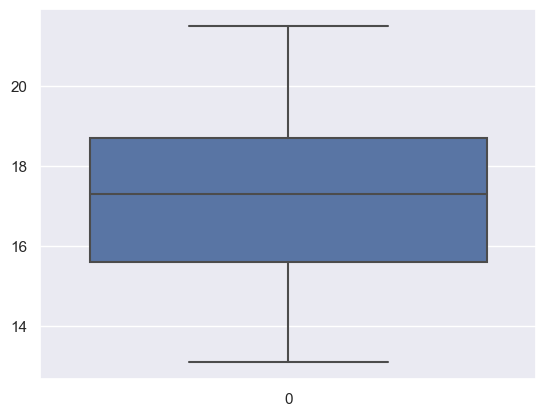

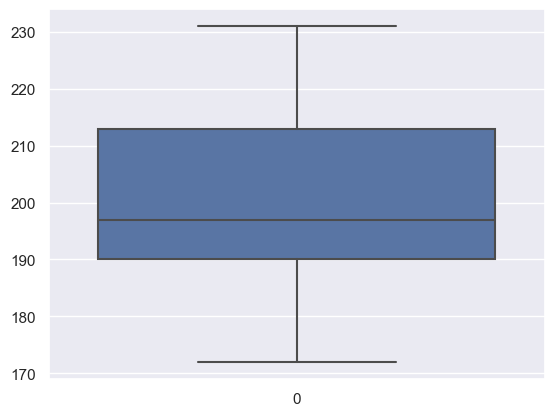

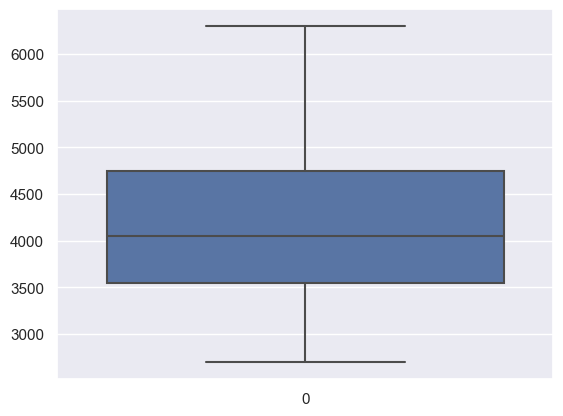

In [17]:
#Handle missing data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
x

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Torgersen,39.1,18.7,181.0,3800.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,190.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
y

0      Adelie Penguin (Pygoscelis adeliae)
1      Adelie Penguin (Pygoscelis adeliae)
2      Adelie Penguin (Pygoscelis adeliae)
3      Adelie Penguin (Pygoscelis adeliae)
4      Adelie Penguin (Pygoscelis adeliae)
                      ...                 
339      Gentoo penguin (Pygoscelis papua)
340      Gentoo penguin (Pygoscelis papua)
341      Gentoo penguin (Pygoscelis papua)
342      Gentoo penguin (Pygoscelis papua)
343      Gentoo penguin (Pygoscelis papua)
Name: Species, Length: 344, dtype: object

In [21]:
#using SKLearn in impute missing value

from sklearn.impute import SimpleImputer
simple_impute = SimpleImputer(strategy='mean')
x[:, 1:5] = simple_impute.fit_transform(x[:, 1:5])
x = pd.DataFrame(x, columns=x.columns)

InvalidIndexError: (slice(None, None, None), slice(1, 5, None))

In [22]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [23]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [24]:
df['Sex'] = np.where(df['Sex']=='.','MALE', df['Sex'])

In [25]:
df.value_counts()

Species                              Island     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex   
Adelie Penguin (Pygoscelis adeliae)  Biscoe     34.5                18.1               187.0                2900.0         FEMALE    1
Gentoo penguin (Pygoscelis papua)    Biscoe     44.0                13.6               208.0                4350.0         FEMALE    1
                                                43.6                13.9               217.0                4900.0         FEMALE    1
                                                43.5                15.2               213.0                4650.0         FEMALE    1
                                                                    14.2               220.0                4700.0         FEMALE    1
                                                                                                                                    ..
Adelie Penguin (Pygoscelis adeliae)  Torgersen  36.6        

In [26]:
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,3800.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,190.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.900585,4201.900585,NaN
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [27]:
#dependent variable 

df = pd.get_dummies(df, columns=['Island', 'Sex'])


In [28]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,0,1,0,0
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [29]:
df = df.drop(columns=['Island_Biscoe','Sex_FEMALE'])

In [30]:
df.describe()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,43.921930,17.151170,200.900585,4201.900585,0.360465,0.151163,0.491279
std,0.893320,5.443643,1.969027,14.029396,799.535241,0.480835,0.358729,0.500652
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000,0.000000,0.000000,0.000000
75%,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,0.000000,1.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000,1.000000


### Imbalance check

Number of male : 175
Number of female : 169


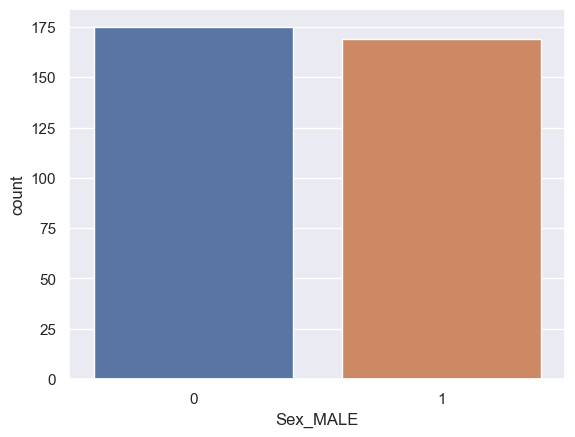

In [31]:
sns.countplot(data=df, x='Sex_MALE')
male, female = df['Sex_MALE'].value_counts()
print('Number of male :',male)
print('Number of female :', female)

Number of A : 152
Number of B : 124
Number of c : 68


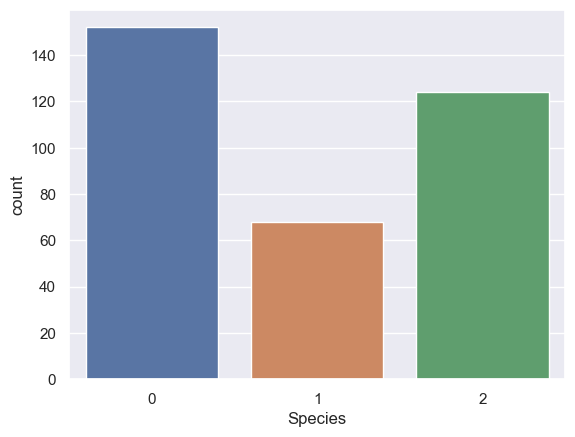

In [32]:
sns.countplot(data=df, x='Species')
a,b,c  = df['Species'].value_counts()
print('Number of A :',a)
print('Number of B :',b)
print('Number of c :',c)

#Data is balanced.
# 68 *2 > 124 = Balanced
# 124 *2 > 152 = Balanced

In [33]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_Dream',
       'Island_Torgersen', 'Sex_MALE'],
      dtype='object')

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

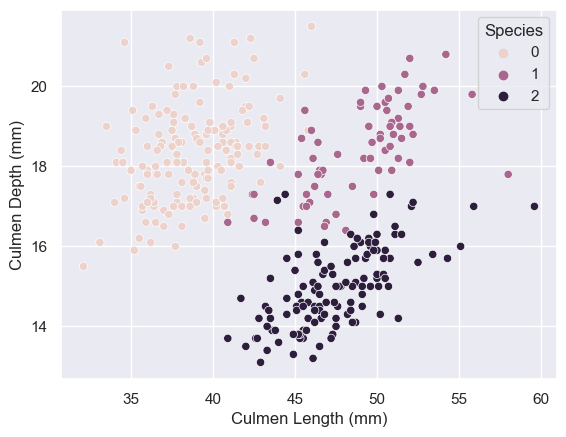

In [34]:
sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', data=df, hue='Species')

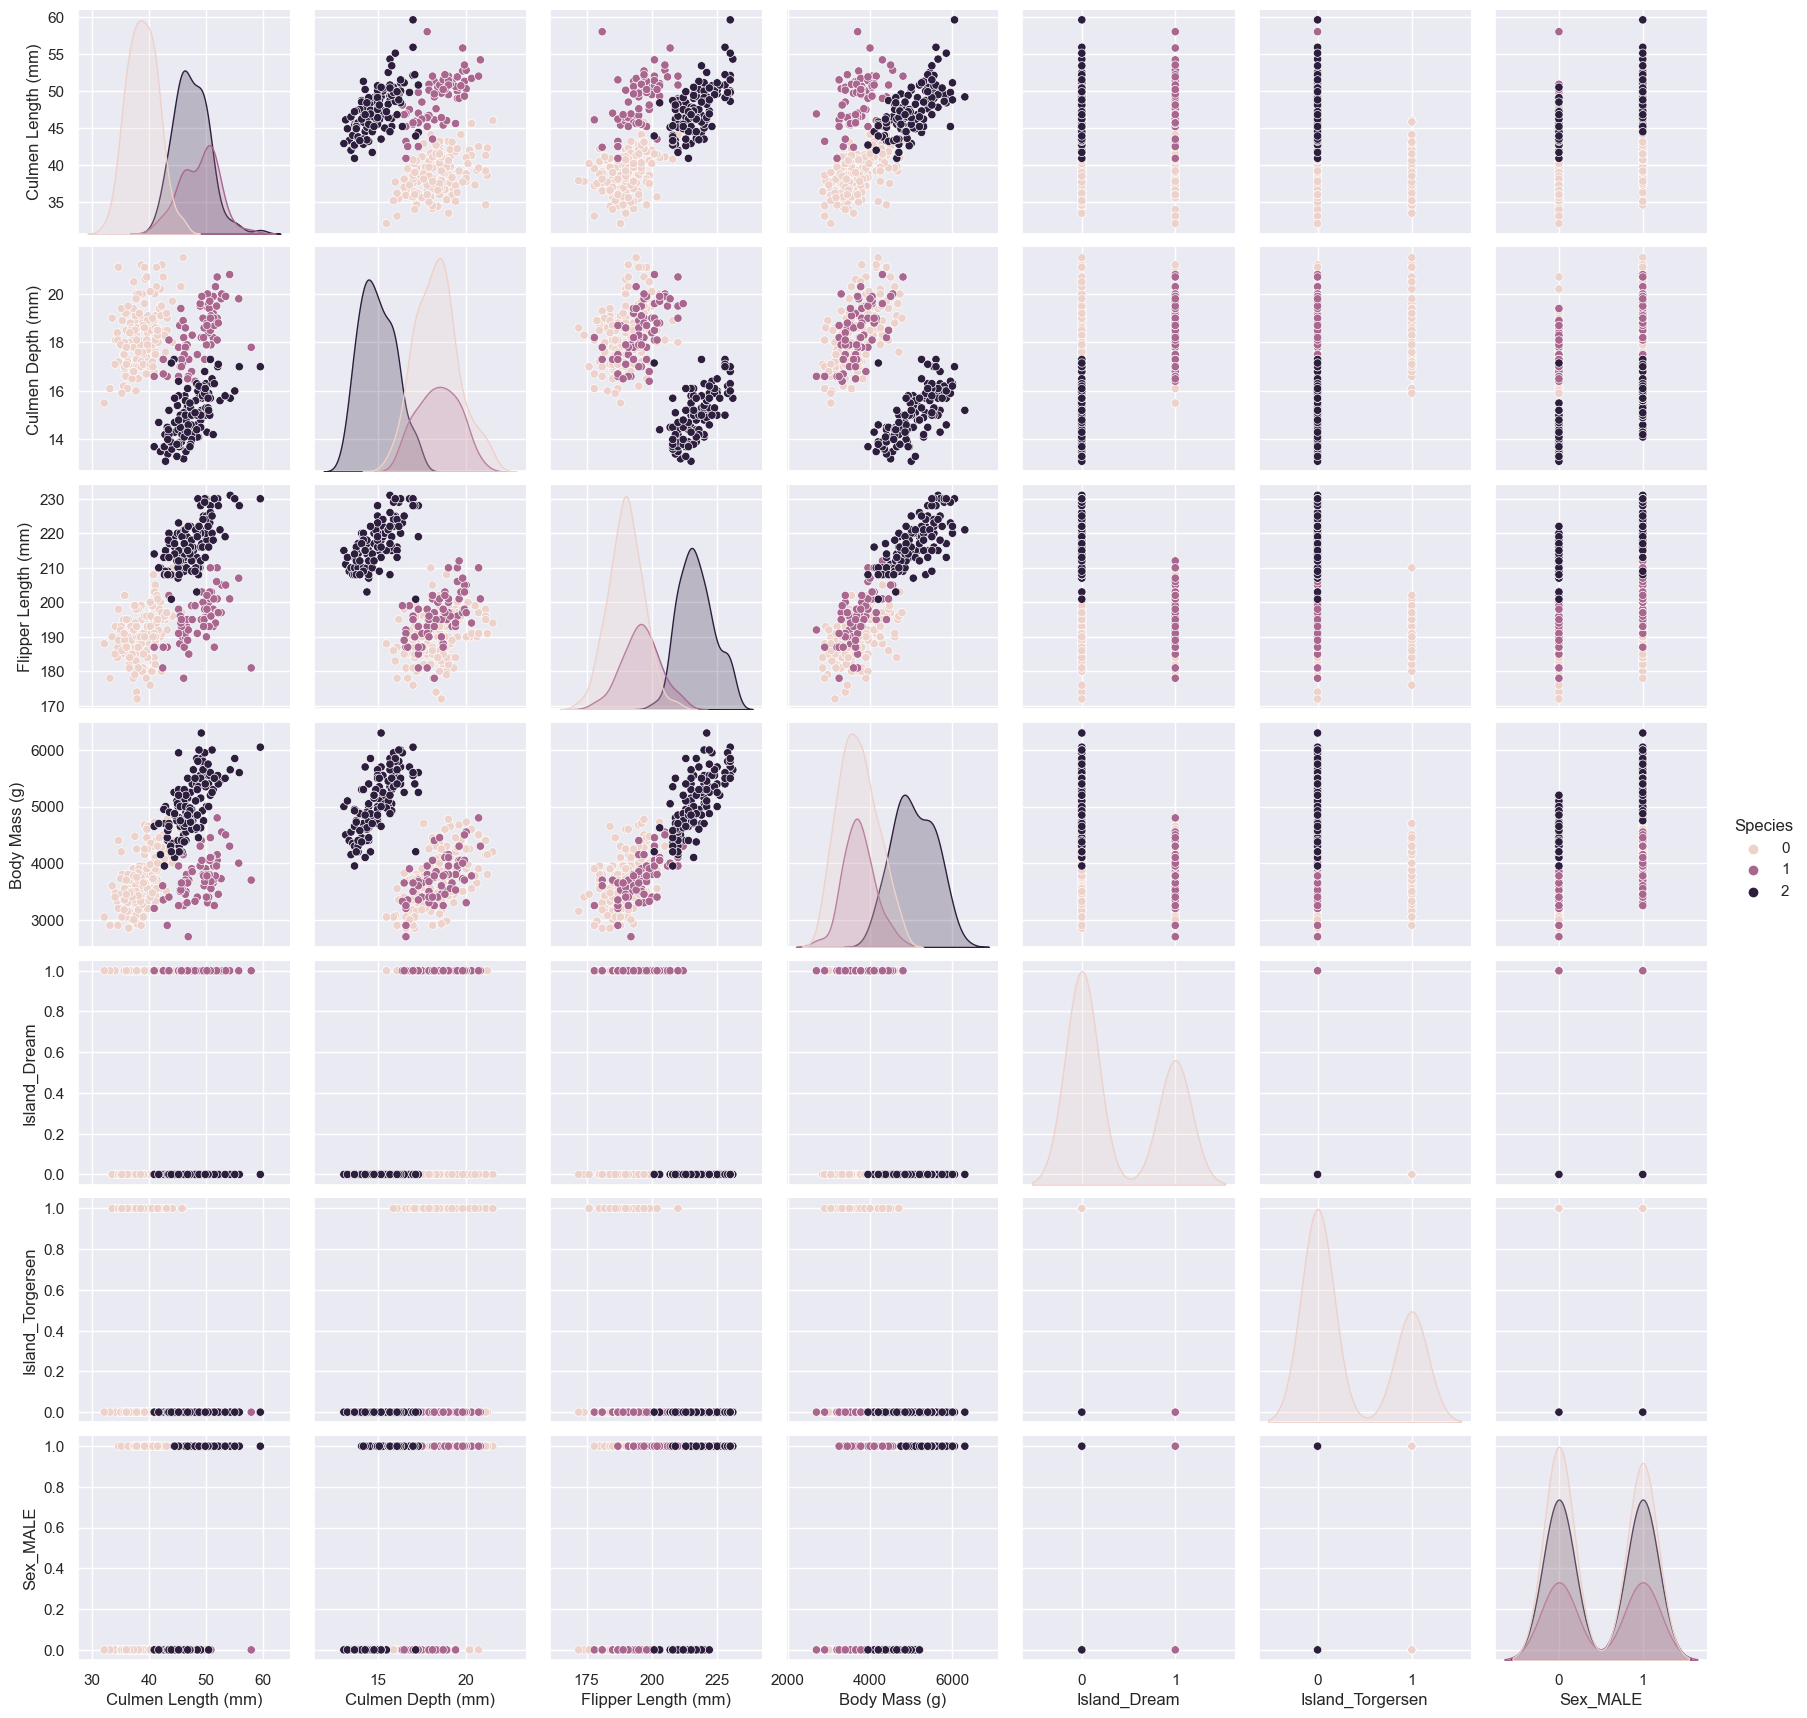

In [35]:
sns.pairplot(data=df, hue='Species')
plt.show()

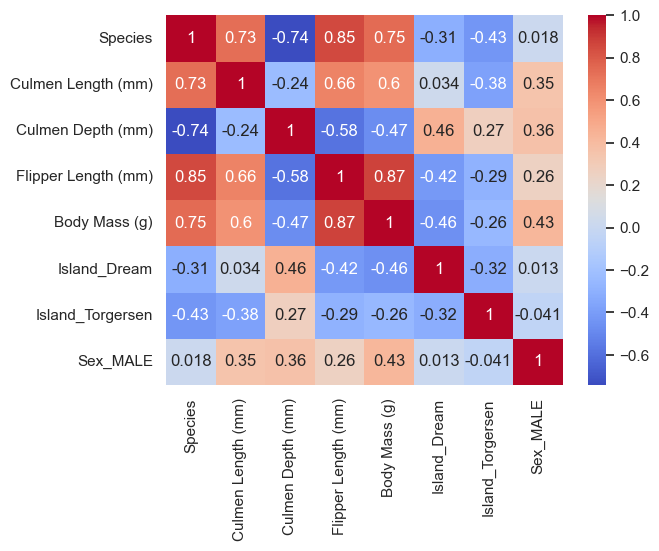

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

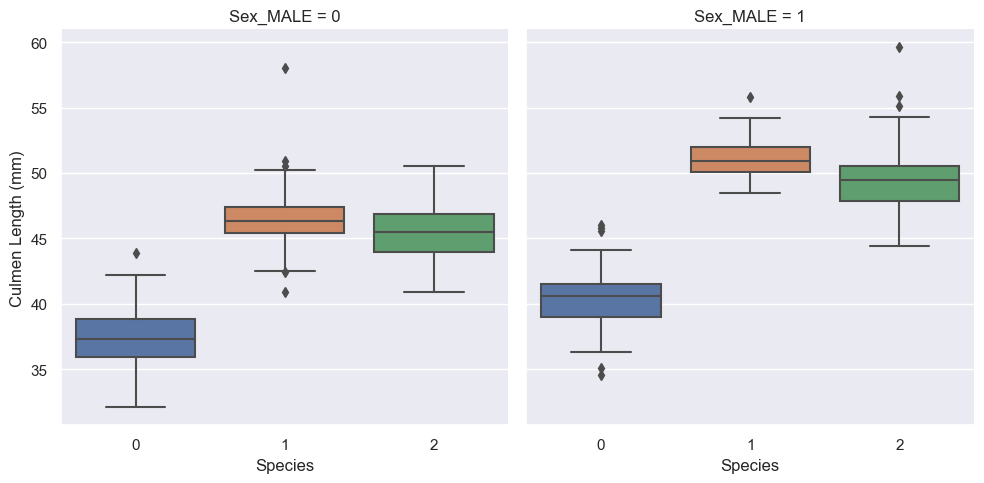

In [37]:
sns.catplot(data=df, x='Species', y='Culmen Length (mm)', kind='box', col='Sex_MALE')

In [38]:
#Split into train and test
#Date: Jul 25
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,0
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [39]:
x = df.iloc[:,1:]
y = df['Species']

In [40]:
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.900585,4201.900585,0,1,0
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.900585,4201.900585,0,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int8

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=102)

## Building decision tree classifier model. Criterion = GINI and Entropy

In [46]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [47]:
#Prediction
#Gini
y_pred_train_dt1 = dt1.predict(x_train)
y_pred_test_dt1 = dt1.predict(x_test)

#Entropy
y_pred_train_dt2 = dt2.predict(x_train)
y_pred_test_dt2 = dt2.predict(x_test)

In [48]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Gini
print(classification_report(y_train, y_pred_train_dt1))

print(classification_report(y_test, y_pred_test_dt1))

#If it is character gini works better

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        94

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [49]:
#Entropy
print(classification_report(y_train, y_pred_train_dt2))

print(classification_report(y_test, y_pred_test_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        94

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



In [50]:
#Gini
print(confusion_matrix(y_train, y_pred_train_dt1))

print(confusion_matrix(y_test, y_pred_test_dt1))

[[115   0   0]
 [  0  49   0]
 [  0   0  94]]
[[37  0  0]
 [ 0 19  0]
 [ 0  0 30]]


In [51]:
#Entropy
print(confusion_matrix(y_train, y_pred_train_dt2))

print(confusion_matrix(y_test, y_pred_test_dt2))

[[115   0   0]
 [  0  49   0]
 [  0   0  94]]
[[37  0  0]
 [ 1 18  0]
 [ 0  0 30]]


In [52]:
#Accuracy 
#Gini
print(accuracy_score(y_train, y_pred_train_dt1))

print(accuracy_score(y_test, y_pred_test_dt1))

1.0
1.0


In [53]:
#Entropy
print(accuracy_score(y_train, y_pred_train_dt2))

print(accuracy_score(y_test, y_pred_test_dt2))

1.0
0.9883720930232558


In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

plt = ConfusionMatrixDisplay(dt1, x_test, y_test)
plt.show()

TypeError: ConfusionMatrixDisplay.__init__() takes 2 positional arguments but 4 were given

In [ ]:
#Try with german credit dataset

In [58]:
#Check feature importance

dt1.feature_importances_

array([0.34035198, 0.05006557, 0.53482116, 0.01313137, 0.02655456,
       0.00612797, 0.02894739])

In [59]:
dt2.feature_importances_

array([0.2729913 , 0.08244071, 0.52571478, 0.01500211, 0.08447889,
       0.00709267, 0.01227954])

In [60]:
pd.DataFrame(index=x.columns, data=dt1.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.340352
Culmen Depth (mm),0.050066
Flipper Length (mm),0.534821
Body Mass (g),0.013131
Island_Dream,0.026555
Island_Torgersen,0.006128
Sex_MALE,0.028947


In [61]:
pd.DataFrame(index=x.columns, data=dt2.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.272991
Culmen Depth (mm),0.082441
Flipper Length (mm),0.525715
Body Mass (g),0.015002
Island_Dream,0.084479
Island_Torgersen,0.007093
Sex_MALE,0.012280


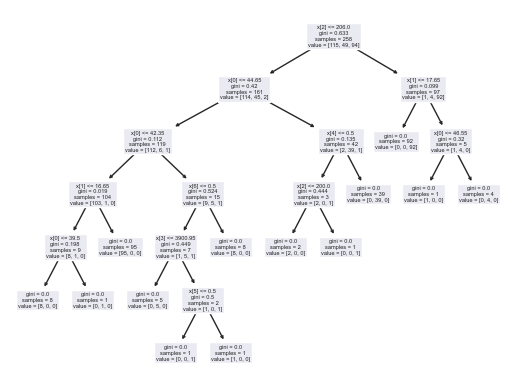

In [62]:
from sklearn.tree import plot_tree
plot_tree(dt1)
plt.Figure(figsize=(15,12))
plt.show()

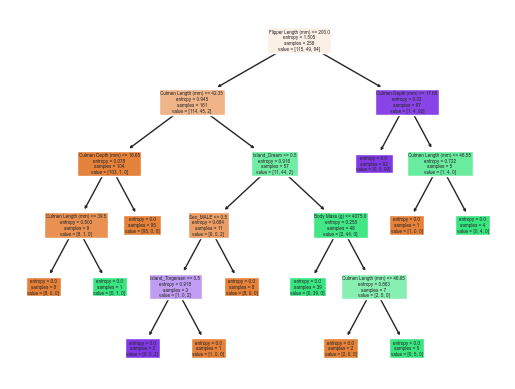

In [68]:
from sklearn.tree import plot_tree
plot_tree(dt2, filled=True, feature_names=x.columns)
plt.Figure(figsize=(15,12))
plt.show()

In [71]:
# When model is overfitting, apply post-pruning 

def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print()
    print(plt.figure(figsize=(15,12), dpi=150))
    plot_tree(model, filled=True, feature_names=x.columns)


In [73]:
pruned_dtree = DecisionTreeClassifier(max_depth=3)
pruned_dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86


Figure(2250x1800)


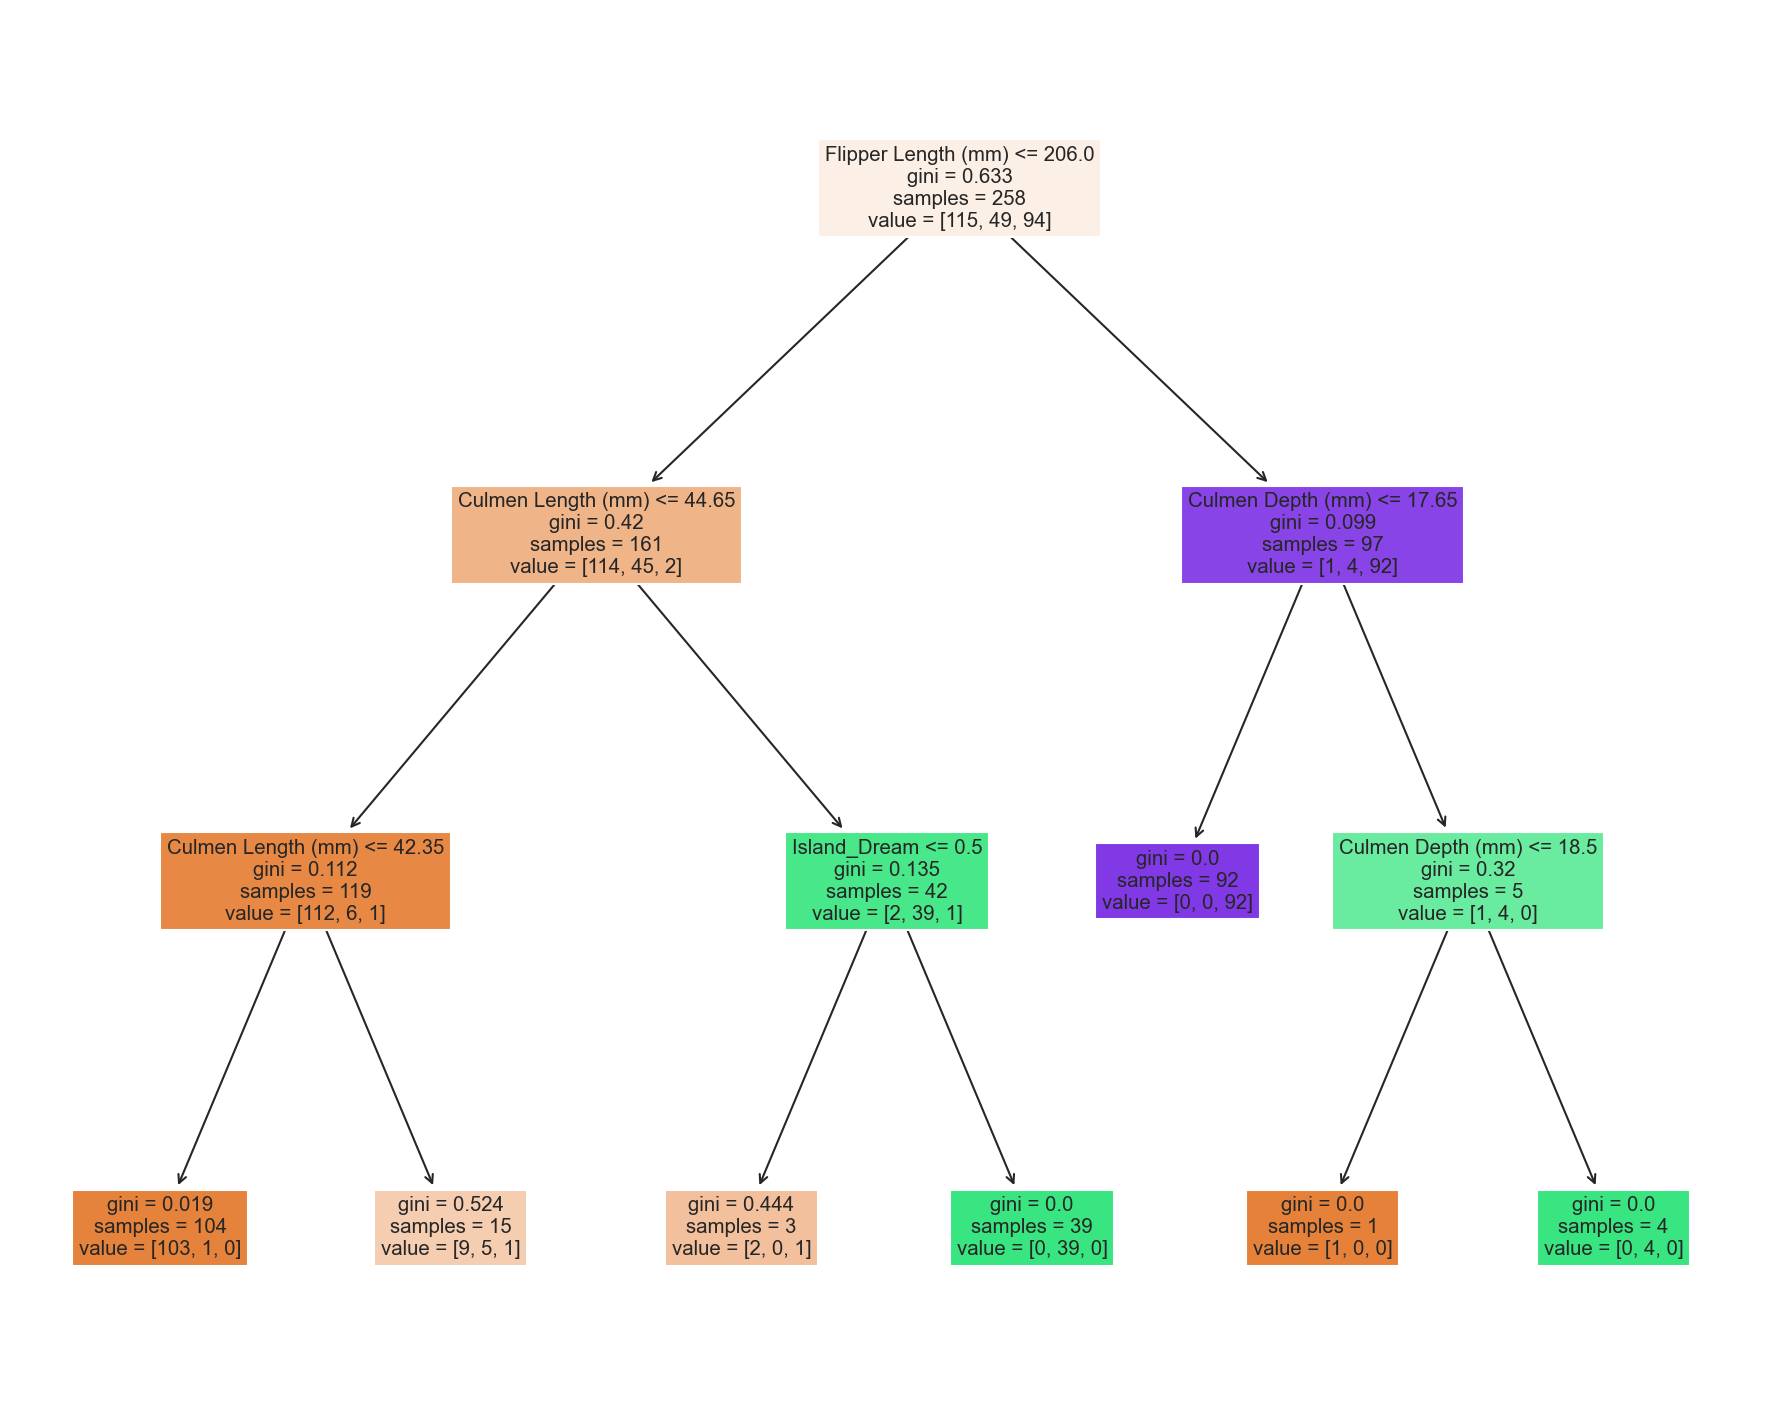

In [74]:
report_model(pruned_dtree)

In [76]:
y_pred_pruned_train = pruned_dtree.predict(x_train)
y_pred_pruned_test = pruned_dtree.predict(x_test)

print(accuracy_score(y_train, y_pred_pruned_train))
print(accuracy_score(y_test, y_pred_pruned_test))

0.9689922480620154
0.9883720930232558


In [78]:
#Cross validation approach

from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(pruned_dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(pruned_dtree, x_test, y_test, cv=10)

print(training_accuracy)
print(test_accuracy)

print(training_accuracy.mean())
print(test_accuracy.mean())

[0.96153846 1.         1.         0.92307692 0.88461538 0.92307692
 0.96153846 0.96153846 1.         0.96      ]
[1.         1.         1.         1.         1.         0.77777778
 0.875      1.         1.         0.875     ]
0.9575384615384618
0.9527777777777778
